In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [2]:
#reading the csv file 
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info() #after duplicates were dropped, there was a row dropped.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [7]:
data.describe()['charges']

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [8]:
population_per_region=pd.pivot_table(data, index=['region'],values='age', aggfunc='count')
population_per_region.columns.name='Population'
population_per_region #Getting total population per regions

Population,age
region,
northeast,324
northwest,324
southeast,364
southwest,325


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Explorative Data Analysis

In [11]:
data_num=data[['age','bmi','children','charges']]

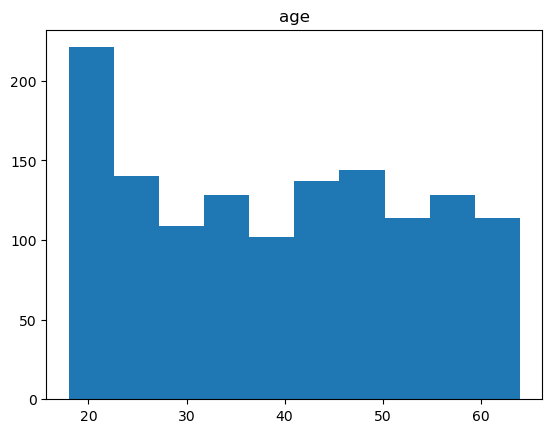

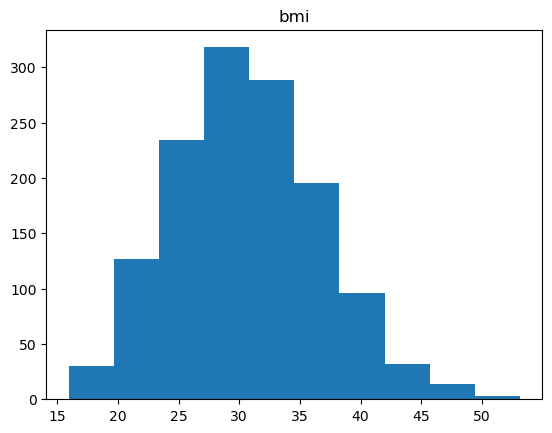

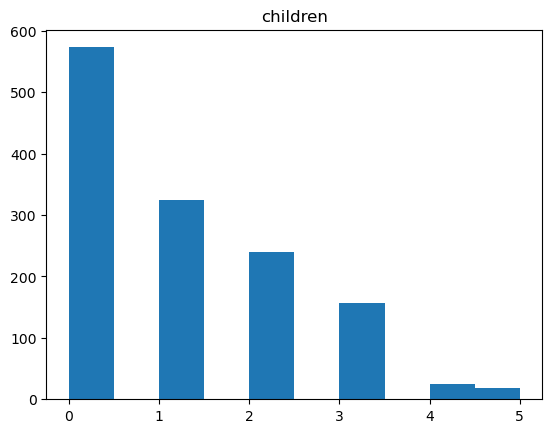

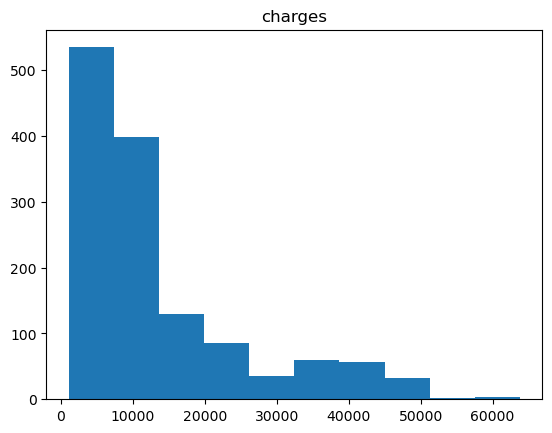

In [12]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show() #code to check for outliers

Scatter plot of all numerical columns

Text(0.5, 1.0, 'Scatter plot of Age against BMI')

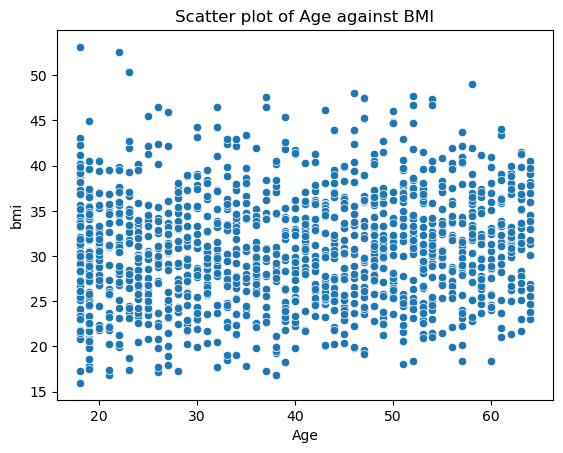

In [13]:
sns.scatterplot(x=data['age'],y=data['bmi'])
plt.xlabel('Age')
plt.ylabel('bmi')
plt.title('Scatter plot of Age against BMI')

Text(0.5, 1.0, 'Scatter plot of Age against Charges')

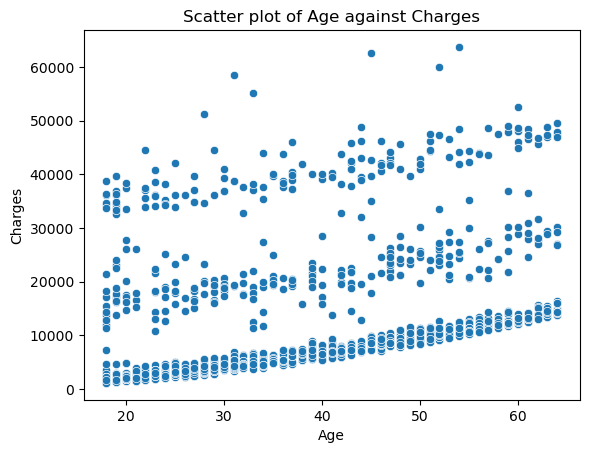

In [14]:
sns.scatterplot(x=data['age'],y=data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter plot of Age against Charges')

Text(0.5, 1.0, 'Scatter plot of Age against Children')

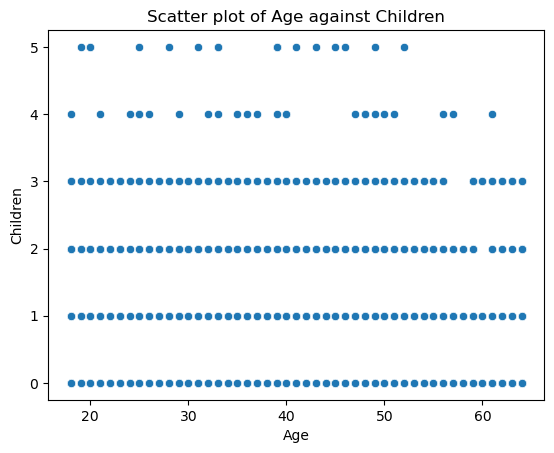

In [15]:
sns.scatterplot(x=data['age'],y=data['children'])
plt.xlabel('Age')
plt.ylabel('Children')
plt.title('Scatter plot of Age against Children')

Text(0.5, 1.0, 'Scatter plot of BMI against Charges')

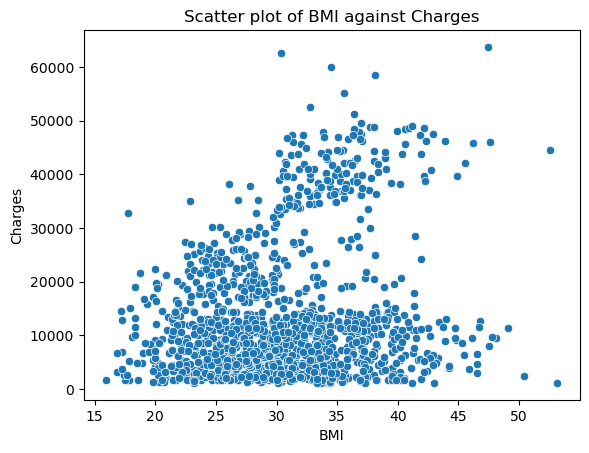

In [16]:
sns.scatterplot(x=data['bmi'],y=data['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter plot of BMI against Charges')

Text(0.5, 1.0, 'Scatter plot of BMI against Children')

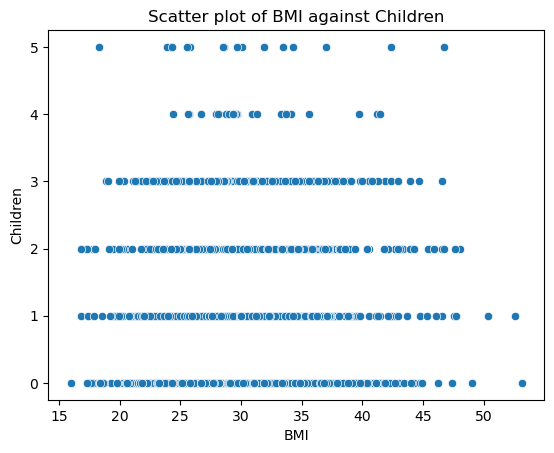

In [17]:
sns.scatterplot(x=data['bmi'],y=data['children'])
plt.xlabel('BMI')
plt.ylabel('Children')
plt.title('Scatter plot of BMI against Children')

Text(0.5, 1.0, 'Scatter plot of Children against Charges')

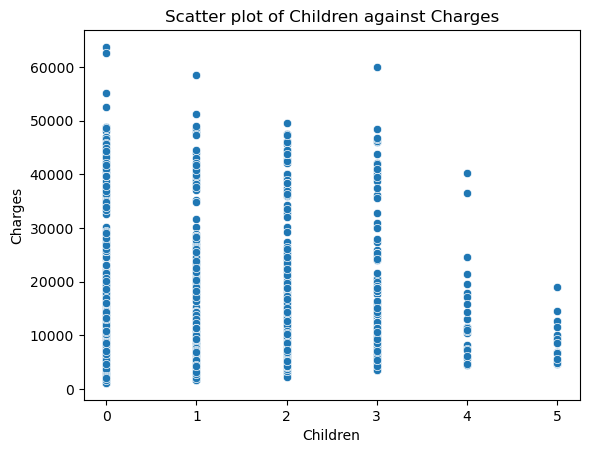

In [18]:
sns.scatterplot(x=data['children'],y=data['charges'])
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Scatter plot of Children against Charges')

In [19]:
data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [20]:
data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

Label Encoding

In [21]:
data['sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
data['smoker'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

In [22]:
data=pd.get_dummies(data=data, columns=['region'])

In [23]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


Numerical scaling  

In [24]:
cols_to_scale= ['age','bmi','children']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[cols_to_scale]= scaler.fit_transform(data[cols_to_scale])

In [25]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,1,0.321227,0.0,1,16884.92400,0,0,0,1
1,0.000000,0,0.479150,0.2,0,1725.55230,0,0,1,0
2,0.217391,0,0.458434,0.6,0,4449.46200,0,0,1,0
3,0.326087,0,0.181464,0.0,0,21984.47061,0,1,0,0
4,0.304348,0,0.347592,0.0,0,3866.85520,0,1,0,0


# Train-test split

In [26]:
X=data.drop('charges',axis=1)
Y=data['charges']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=5)

In [28]:
#Baseline model
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7205711447644456

In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,Y, cv=cv)

array([0.75303856, 0.78448896, 0.78355844, 0.75201842, 0.80320745])

In [30]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
def find_best_algo_using_gridsearchcv(X,y):
    algos={
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random forest regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion': ['squared_error', 'absolute_error'],
                'max_features' : ['sqrt', 'log2']
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'Gradient boss regressor': {
            'model': GradientBoostingRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'max_features' : ['sqrt', 'log2']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size= 0.2, random_state=0)
    for algo_name, config in algos.items():
        gs= GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train,y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_algo=find_best_algo_using_gridsearchcv(X_train,y_train)
best_algo

,model,best_score,best_params
0,decision tree,0.688961,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
1,random forest regressor,0.821517,"{'criterion': 'absolute_error', 'max_features'..."
2,lasso,0.737929,"{'alpha': 2, 'selection': 'random'}"
3,Gradient boss regressor,0.832995,"{'criterion': 'friedman_mse', 'max_features': ..."


In [31]:
best_algo.iloc[3]['best_params']

{'criterion': 'friedman_mse', 'max_features': 'sqrt'}

In [32]:
training=GradientBoostingRegressor(criterion='squared_error', max_features='log2').fit(X_train,y_train)

In [33]:
training.score(X_test,y_test)

0.8311760889890567

In [34]:
X_age=data['age']
y_target=data['charges']

In [35]:
X_age_train,X_age_test,y_age_train,y_age_test=train_test_split(X_age,y_target, test_size=0.2, random_state=5)

 # Nonlinear relationship


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # One hidden layer with 64 neurons and ReLU activation
model.add(Dense(1, activation='linear'))  # Output layer with sigmoid activation for binary classification

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_age_train, y_age_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
27/27 [==============================] - 1s 14ms/step - loss: 313720832.0000 - val_loss: 364955968.0000
Epoch 2/20
27/27 [==============================] - 0s 5ms/step - loss: 313713216.0000 - val_loss: 364947360.0000
Epoch 3/20
27/27 [==============================] - 0s 5ms/step - loss: 313704384.0000 - val_loss: 364936800.0000
Epoch 4/20
27/27 [==============================] - 0s 5ms/step - loss: 313693376.0000 - val_loss: 364923808.0000
Epoch 5/20
27/27 [==============================] - 0s 5ms/step - loss: 313679712.0000 - val_loss: 364907584.0000
Epoch 6/20
27/27 [==============================] - 0s 5ms/step - loss: 313663072.0000 - val_loss: 364887680.0000
Epoch 7/20
27/27 [==============================] - 0s 5ms/step - loss: 313642688.0000 - val_loss: 364864288.0000
Epoch 8/20
27/27 [==============================] - 0s 5ms/step - loss: 313619040.0000 - val_loss: 364836704.0000
Epoch 9/20
27/27 [==============================] - 0s 5ms/step - loss: 313591360.0000 

## Model evaluation and perfomance

From the base model which is the linear regression, the score on the test data is 0.72. But further hypertuning and further evaluation shows that Gradient boosting regressor has a score of 0.83 which shows a higher performance over the base model. However, adding a non-linear relationship using age as the input, a neural network was used of one input layer and it improved the model score.